## Observations and Insights 

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
pymaceuticals_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
# Checking the number of mice.
number_mice = pymaceuticals_data_complete.groupby("Mouse ID")
len(number_mice)

249

In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = pymaceuticals_data_complete.loc[pymaceuticals_data_complete.duplicated(subset = 
                                                                ['Mouse ID', 'Timepoint']),"Mouse ID"].unique()



In [139]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df


array(['g989'], dtype=object)

In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = pymaceuticals_data_complete[pymaceuticals_data_complete["Mouse ID"].isin(duplicate_df)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [95]:
# Checking the number of mice in the clean DataFrame.
len(clean_df.groupby("Mouse ID"))

248

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_data = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
med_data = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_data = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_data = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_data = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = pd.DataFrame({"Mean": mean_data, "Median": med_data, "Variance": var_data, "Standard Deviation": std_data,
                          "SEM": sem_data})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [101]:
summary_df2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function



## Bar and Pie Charts

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


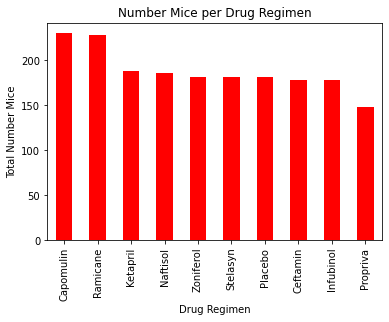

<Figure size 432x288 with 0 Axes>

In [102]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_mice = clean_df["Mouse ID"].value_counts()
regimen_data = clean_df["Drug Regimen"].value_counts()


regimen_data.plot(kind="bar", facecolor="red")
plt.title("Number Mice per Drug Regimen")
plt.ylabel("Total Number Mice")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

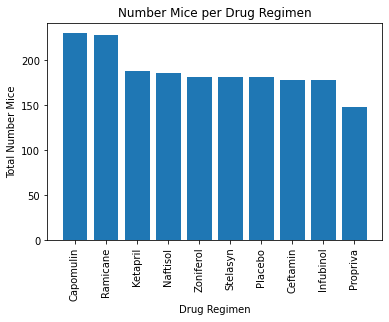

In [146]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(regimen_data.index.values,regimen_data.values)
plt.title("Number Mice per Drug Regimen")
plt.ylabel("Total Number Mice")
plt.xlabel("Drug Regimen")
plt.show
plt.xticks(rotation=90)


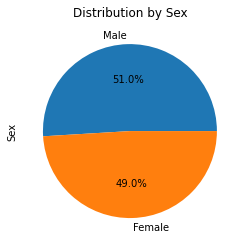

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data.plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution by Sex")
plt.show()


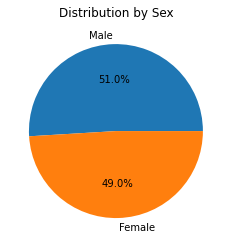

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_data = clean_df["Sex"].value_counts()
plt.pie(gender_data.values, labels=gender_data.index.values, autopct='%1.1f%%')
plt.title("Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID").max()["Timepoint"]
merge_df=pd.merge(last_timepoint, clean_df, how="left", on=["Mouse ID", "Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
volume_list = []
for x in drug_list:
    drug_volume = merge_df.loc[(merge_df["Drug Regimen"] == x)]["Tumor Volume (mm3)"]
    volume_list.append(drug_volume)

    quartiles = drug_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = drug_volume.loc[(drug_volume < lower_bound) | (drug_volume > upper_bound)]
    print(f"{x} Outlier is: {outlier}")
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin Outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outlier is: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Outlier is: Series([], Name: Tumor Volume (mm3), dtype: float64)


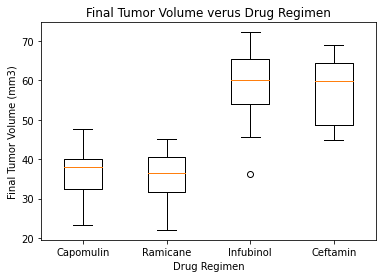

In [149]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(volume_list, labels=drug_list)
plt.title("Final Tumor Volume verus Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

In [77]:
capomulin_df.groupby("Mouse ID").head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
435,i557,Capomulin,Female,1,24,20,43.967895,0
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


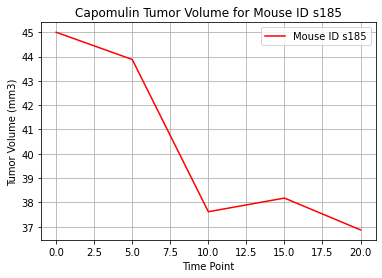

In [72]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time = np.arange(0,50,5)

time_point = [0, 5, 10, 15, 20]
tumor_volume = [45, 43.878496, 37.614948, 38.177232, 36.866876]
s_185, = plt.plot(time_point, tumor_volume, color="red", label="Mouse ID s185")
plt.title("Capomulin Tumor Volume for Mouse ID s185")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[s_185], loc="best")
plt.grid()
plt.show()

In [123]:
capo_df = capomulin_df.groupby("Mouse ID").mean()
capo_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


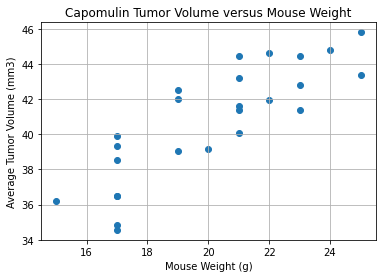

In [151]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


plt.scatter(capo_df["Weight (g)"],capo_df["Tumor Volume (mm3)"])
plt.title("Capomulin Tumor Volume versus Mouse Weight")

plt.grid()

plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")

plt.show()


## Correlation and Regression

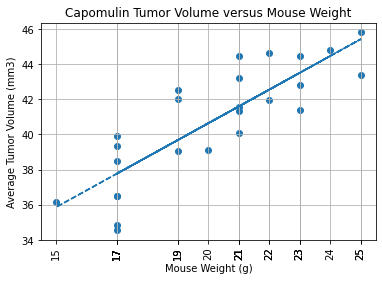

In [152]:
# Calculate the correlation coefficient and linear regression model 

plt.scatter(capo_df["Weight (g)"],capo_df["Tumor Volume (mm3)"])

plt.xticks(capo_df["Weight (g)"], rotation=90)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.title("Capomulin Tumor Volume versus Mouse Weight")

plt.grid()
capo_slope, capo_int, capo_r, capo_p, capo_std_err = st.linregress(capo_df["Weight (g)"],capo_df["Tumor Volume (mm3)"])
capo_fit = capo_slope * capo_df["Weight (g)"] + capo_int
plt.plot(capo_df["Weight (g)"],capo_fit,"--")
plt.show()

In [145]:
print(f"The linear regression equation is: Average Tumor Volume (mm3) = {capo_slope} mm3/g * Mouse Weight (g) + {capo_int} mm3")
print(f"The correlation coefficient is: {capo_r}")

The linear regression equation is: Average Tumor Volume (mm3) = 0.9544396890241046 mm3/g * Mouse Weight (g) + 21.552160532685015 mm3
The correlation coefficient is: 0.8419363424694719
